In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# XGBoost
from xgboost import XGBClassifier

# LightGBM
from lightgbm import LGBMClassifier

# Plotting style
sns.set(style="whitegrid")

# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n📊 {model_name} Evaluation Results:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [2]:
# Load the dataset
data = pd.read_csv("Data/features_10000.csv")
data.head()


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0
1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0
2,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,1,1,4,0,0,0,0,0,1,1,1,1,1,1,1,0
4,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0


In [3]:
# Inspect the dataset
print("Shape:", data.shape)
print("\nColumns:", data.columns)
data.info()


Shape: (10000, 17)

Columns: Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_Domain   10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix/Suffix  10000 non-null  int64
 8   DNS_Record     10000 non-null  int64
 9   Web_Traffic    10000 non-null  int64
 10  Domain_Age     10000 non-null  int64
 11  Domain_End     10000 non-null  i

In [4]:
# Check for missing values
print(data.isnull().sum())


Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64


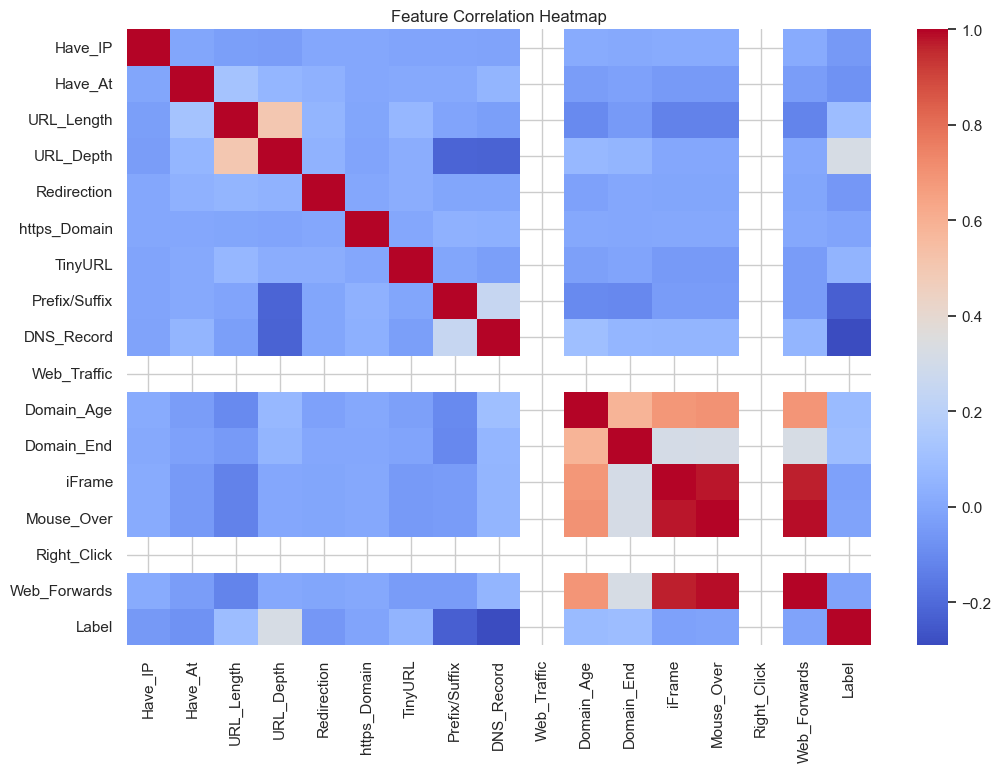

In [5]:
# Visualize feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Separate features and label
X = data.drop('Label', axis=1)
y = data['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1012
           1       0.76      0.87      0.81       988

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000

Confusion Matrix:


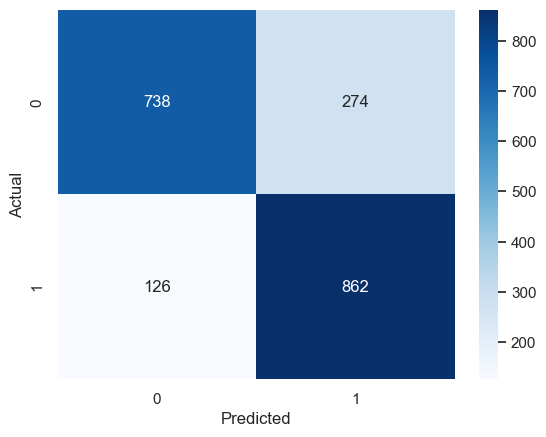

In [9]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)



In [11]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)


[LightGBM] [Info] Number of positive: 4012, number of negative: 3988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501500 -> initscore=0.006000
[LightGBM] [Info] Start training from score 0.006000


In [12]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


In [13]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
display(results_df)


[LightGBM] [Info] Number of positive: 4012, number of negative: 3988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501500 -> initscore=0.006000
[LightGBM] [Info] Start training from score 0.006000


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.8000,0.7593,0.8715,0.8115
3,XGBoost,0.8000,0.7593,0.8715,0.8115
2,SVM,0.7970,0.7500,0.8836,0.8113
4,LightGBM,0.7995,0.7595,0.8694,0.8108
0,Logistic Regression,0.7760,0.7398,0.8431,0.7881


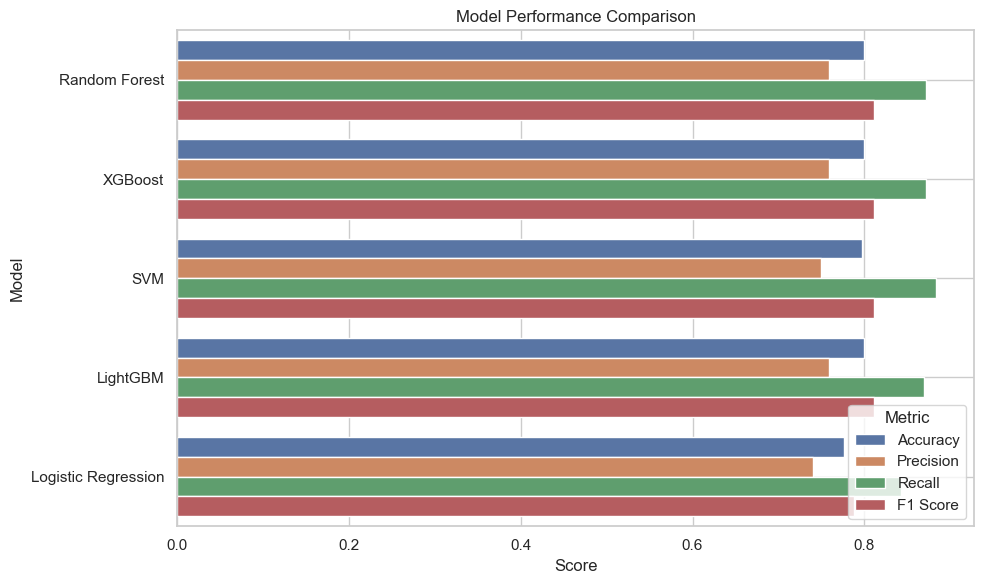

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1 Score"]),
            x="value", y="Model", hue="variable")
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import joblib

# Save both model and scaler
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl") 



['scaler.pkl']

In [17]:
import joblib

# Save features
joblib.dump(X_train.columns.tolist(), 'features.pkl')

['features.pkl']